# Libraries

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


# Data Collection

In [97]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize data (pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0


# Data Exploration

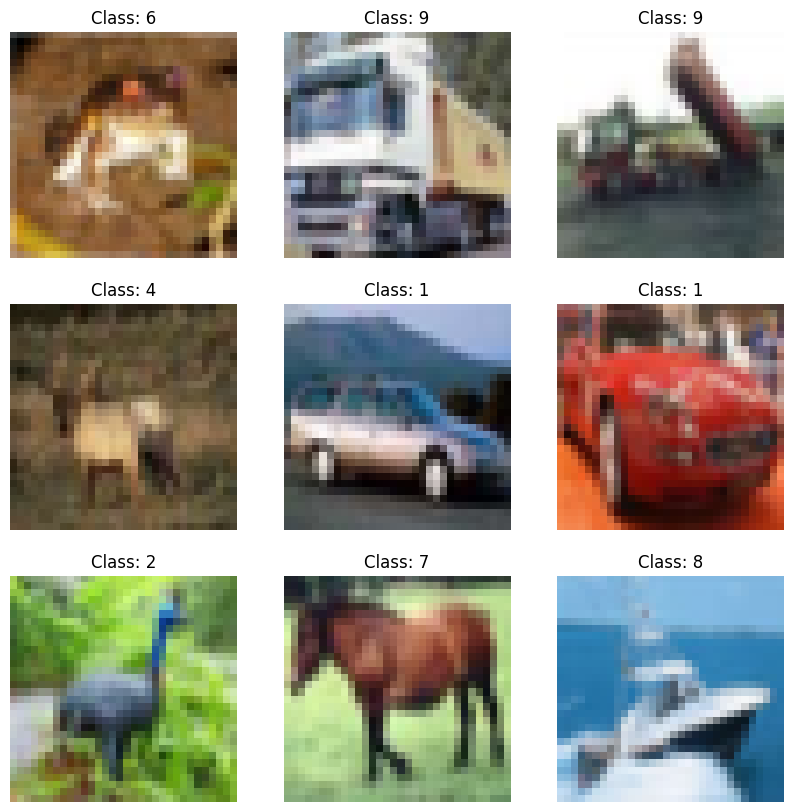

In [98]:

#Show sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {y_train[i][0]}")
    plt.axis("off")
plt.show()

# Model Design

##### Convolution: A mathematical operation that combines two functions (or signals) to produce a third function

 **`Conv2D(32, (3, 3))`**: 
  - Adds a 2D convolutional layer with **32 filters** (also known as kernels), each of size **3x3**. 
- **`activation='relu'`**: 
  - Uses the ReLU (Rectified Linear Unit) activation function, which helps introduce non-linearity. 
- **`input_shape=(32, 32, 3)`**: 
  - Specifies the input shape of the images (**32 pixels high**, **32 pixels wide**, and **3 color channels** for RGB).


In [99]:


#CNN model
model = models.Sequential()

# Convolutional Layers

# 1st Convolutional Layer: 32 filters, kernel size 3x3, ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Max Pooling Layer: reduces dimensionality
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Layer: 64 filters, kernel size 3x3, ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling Layer
model.add(layers.MaxPooling2D((2, 2)))

#3rd Convolutional layer: 64 filters, kernel size 3x3 , ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

#Dense Layers
# Fully connected layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))
# Output layer with 10 units (one for each class) and softmax activation
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for CIFAR-10

#Summary
model.summary()



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_13 (Flatten)        (None, 1024)            

# Compile the Model

loss='sparse_categorical_crossentropy'

This function calculates the difference between the predicted class probabilities and the true class labels.

In [100]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the Model

Each epoch consists of one full cycle through the training data.

In [101]:
 #20% of the data for validation
history = model.fit(x_train, y_train, epochs=12, 
                    batch_size=64, 
                    validation_split=0.2) 


Epoch 1/12
625/625 [==============================] - 16s 23ms/step - loss: 1.6017 - accuracy: 0.4134 - val_loss: 1.3964 - val_accuracy: 0.4966
Epoch 2/12
625/625 [==============================] - 14s 23ms/step - loss: 1.2565 - accuracy: 0.5504 - val_loss: 1.1828 - val_accuracy: 0.5825
Epoch 3/12
625/625 [==============================] - 14s 23ms/step - loss: 1.1078 - accuracy: 0.6080 - val_loss: 1.0872 - val_accuracy: 0.6177
Epoch 4/12
625/625 [==============================] - 14s 23ms/step - loss: 1.0073 - accuracy: 0.6484 - val_loss: 1.0471 - val_accuracy: 0.6377
Epoch 5/12
625/625 [==============================] - 14s 23ms/step - loss: 0.9289 - accuracy: 0.6763 - val_loss: 0.9989 - val_accuracy: 0.6539
Epoch 6/12
625/625 [==============================] - 14s 22ms/step - loss: 0.8648 - accuracy: 0.6984 - val_loss: 0.9146 - val_accuracy: 0.6873
Epoch 7/12
625/625 [==============================] - 14s 22ms/step - loss: 0.8156 - accuracy: 0.7139 - val_loss: 0.9166 - val_accuracy:

# Model Evaluation

In [102]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.9453 - accuracy: 0.6937
Test accuracy: 0.6937000155448914


The current accuracy is 0.7088, solid startpoint

# Visualize Training Results

Comparing T Accuracy and Validation Throughout the Epoch Runs

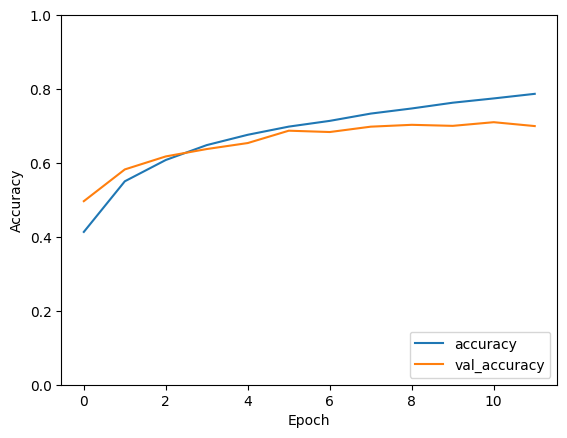

In [103]:
# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Predicting

313/313 [==============================] - 1s 4ms/step


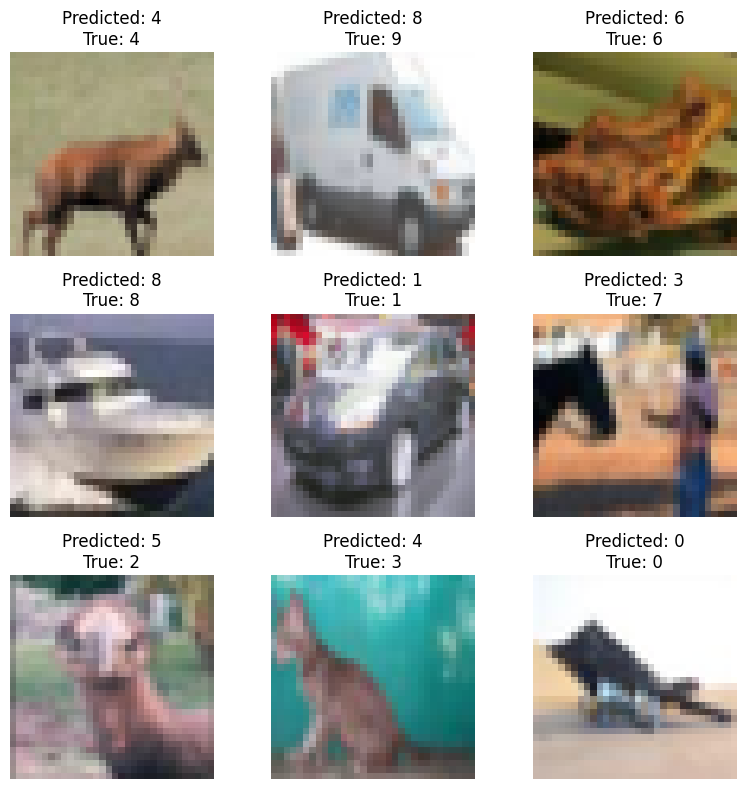

In [104]:

predictions = model.predict(x_test)

#Display 9 images
num_images = 9 
# Randomly select indices
indices = np.random.choice(len(x_test), num_images, replace=False)  

plt.figure(figsize=(8, 8))

for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)  # 3x3 grid
    plt.imshow(x_test[idx])
    plt.title(f"Predicted: {predictions[idx].argmax()}\nTrue: {y_test[idx][0]}")
    plt.axis('off')  #Hide axes

plt.tight_layout()
plt.show()



# Predicting from External Source

Testing the model with a new picture outside of the dataset

In [105]:
uploaded_image_path = r'C:\Users\ivanm\Downloads\old-car.jpg'

1/1 [==============================] - 0s 25ms/step


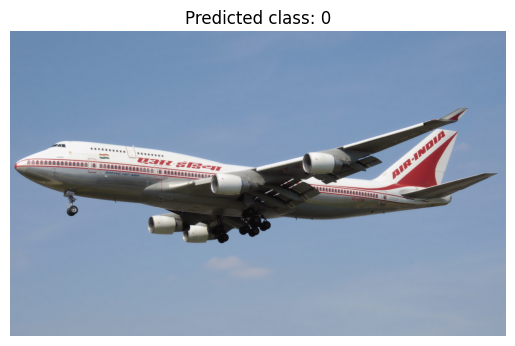

In [107]:
def load_and_preprocess_image(img_path):
    # Load Image
    img = image.load_img(img_path, target_size=(32, 32))
    # Convert to array
    img_array = image.img_to_array(img)
    #Normalize the Image
    img_array = img_array / 255.0
    #dd a batch Dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

#Path to the uploaded image
uploaded_image_path = r"C:\Users\ivanm\Downloads\Air_india_b747-400_vt-esn_arp.jpg"

#Preprocess the image
preprocessed_image = load_and_preprocess_image(uploaded_image_path)

#Make a prediction
predictions = model.predict(preprocessed_image)
predicted_class = predictions.argmax()

#Display the image and prediction
plt.imshow(image.load_img(uploaded_image_path))
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()

Based on the CIFAR-10 classes, the uploaded picture was classified correctly. To improve the accuracy, we can use fine-tuning and increase the resolution of the pictures in the dataset. After these two tests, we can decide if they improve the accuracy to around 95%. Otherwise, we may need to consider a different approach. However, based on different tests, the model has issues reading large pictures.